Step 1:- Importing libraries

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


Step 2:- Set Paths and Load Data

In [15]:
base_dir = 'cats-and-dogs-mini'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)


Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Step 3:- Building the Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

Step 4:- Compile and Train

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - accuracy: 0.4654 - loss: 0.9007 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.5328 - loss: 0.6933 - val_accuracy: 0.5270 - val_loss: 0.6873
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.5677 - loss: 0.6847 - val_accuracy: 0.5620 - val_loss: 0.6563
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6566 - loss: 0.6323 - val_accuracy: 0.6780 - val_loss: 0.5972
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.6749 - loss: 0.5960 - val_accuracy: 0.7730 - val_loss: 0.4904


Step 5:- Visualize Training Results

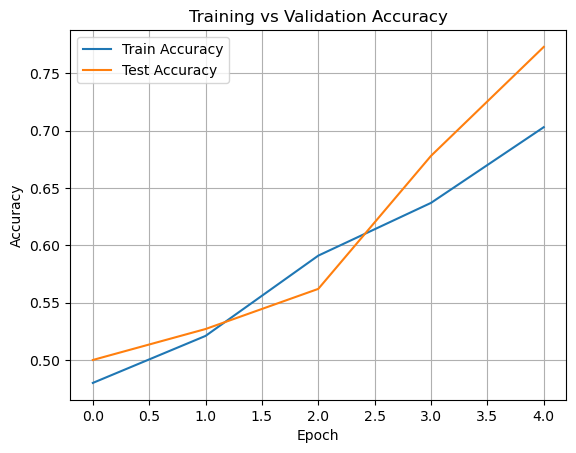

In [18]:
# Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Step 6:- Evalulating the model

In [19]:
# Evaluate final performance
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7808 - loss: 0.4803
Test Accuracy: 0.77


Step 7:- Testing the model

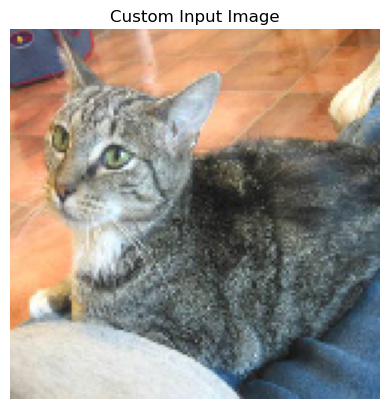

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted: Cat (0.36)


In [22]:
from tensorflow.keras.preprocessing import image

def predict_custom_image(path):
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Custom Input Image")
    plt.show()

    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array /= 255.0

    pred = model.predict(img_array)[0][0]
    label = "Dog" if pred > 0.5 else "Cat"
    print(f"Predicted: {label} ({pred:.2f})")


predict_custom_image("C:/Users/Aniket Bhoge/Downloads/CodSoft/Task 2/cats-and-dogs-mini/test/cats_set/cat.4028.jpg")